Anomaly detection refers to the process of identifying data points that are significantly different from the majority of the other data points. These data points, if they exist, are known as the outliers. 

Anomalies can be global, contextual, or collective. 

There exist various methods to detect anomalies; they can be based on distribution (Minimum Covariance Determinant, Elliptic Envelope), depth (Isolation Forest), 
clustering (Local Outlier Factor), density (DBSCAN), Unified library for Outlier Detection (PyOD), Statistical techniques (Interquartile range), or Visualization (Box-plot).

In this example, we'll use isolationforest algorithm since we're focusing on the (unsupervised) machine learning techniques. 

The IsolationForest is tree-based algorithm that ‘isolates’ outliers by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process produces shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data. 

Let's use a very simple example to detect outliers using Isolation Forest from sklearn.

In [1]:
import pandas as pd

#Generating data
data = {'X': [4, 2, 1, 5, 2, 3, 1, 300, 103, 4], 
     'Y': [3, 4, 2, 1, 3, 5, 100, 500, 1, 3]}
data = pd.DataFrame(data=data)
data

,X,Y
0,4,3
1,2,4
2,1,2
3,5,1
4,2,3
5,3,5
6,1,100
7,300,500
8,103,1
9,4,3


Train data with outliers using the X column.

In [2]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
model.fit(data[['X']])

IsolationForest()

Predict the outliers using the Y column.

In [3]:
data['anomaly_score'] = model.predict(data[['Y']]) #Notice that we're using a new column that the model has not seen before
anomalies = data[data['anomaly_score']==-1].head() #Only keep the outliers
anomalies

,X,Y,anomaly_score
6,1,100,-1
7,300,500,-1


<IPython.core.display.Javascript object>

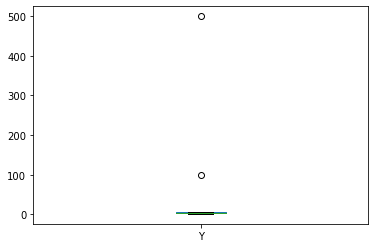

In [4]:
# Generate a Boxplot
data['Y'].plot(kind='box')
plt.show()

All the code put together.

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data = {'X': [4, 2, 1, 5, 2, 3, 1, 300, 103, 4], 
     'Y': [3, 4, 2, 1, 3, 5, 100, 500, 1, 3]}
data = pd.DataFrame(data=data)
#data

model=IsolationForest()
model.fit(data[['X']])

data['anomaly_score'] = model.predict(data[['Y']]) #Notice that we're using a new column that the model has not seen before
anomalies = data[data['anomaly_score']==-1].head() #Only keep the outliers
#anomalies

Useful resources:
- https://blog.paperspace.com/anomaly-detection-isolation-forest/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest
- https://cnvrg.io/anomaly-detection-python/
- https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/